# Data Mining Lab 1 - Fourth HW

Here is the part where I demonstrate how I improved the processing logic or syntax in Lab 1 to make the computation more efficient. I will omit some of the original `print` tests and remove the lengthy supplemental Markdown text descriptions, making the modified sections easier to read.    
Additionally, I will mark the modified parts 
> in this format above them.   

Below is the fourth assignment.

---

In [363]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. 

## 2. Data Preparation

In [364]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups
# Modularize the Data Loading
def load_newsgroups_data(categories=categories, subset='train', shuffle=True, random_state=42):
    """Load the 20 newsgroups dataset for the given categories."""
    return fetch_20newsgroups(subset=subset, categories=categories, shuffle=shuffle, random_state=random_state)

In [365]:
twenty_train = load_newsgroups_data()

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [366]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [367]:
# add category to the dataframe
X['category'] = twenty_train.target

> `.apply()` is suitable for more complex logic operations where conditional checks or transformations are needed. For instance, when processing the entire row of data or involving complex logic during conversion, `.apply()` is preferred. However, for simple label mapping, `.map()` is more efficient as it directly maps values without the flexibility (and overhead) of `.apply()`.

In [368]:
# add category label also
X['category_name'] = X['category'].map(lambda t: dmh.format_labels(t, twenty_train))

In [369]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### 3.2 Familiarizing yourself with the Data   
This part can be simply omitted.

In [370]:
# a simple example
X[:10][["text","category"]]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2


## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

In [371]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [372]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### add the dummy data and test

> Original Code: The original code created a dummy_series and then used `to_frame()`. T to convert it to a transposed DataFrame. This was repeated multiple times.

In [373]:
# Create dummy_series and convert it directly to a DataFrame
dummy_df = pd.DataFrame([{"text": "dummy_record", "category": 1}])
result_with_series = pd.concat([X, dummy_df], ignore_index=True)

In [374]:
# Generate a summary of missing values
missing_values_summary = result_with_series.isna().sum().reset_index()
missing_values_summary.columns = ["Column", "Missing Values"]

> Added a missing value summary at the end, which calculates and displays the number of missing values for each column in a tabular format.

In [375]:
# check if the records was commited into result
display(missing_values_summary)

,Column,Missing Values
0,text,0
1,category,0
2,category_name,1


In [376]:
X.dropna(inplace=True)

In [377]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [378]:
len(X)

2257

### 4.2 Dealing with Duplicate Data

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [379]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [380]:
sum(X.duplicated())

0

In [381]:
sum(X.duplicated('text'))

0

In [382]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [383]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [384]:
len(X)

2259

In [385]:
sum(X.duplicated())

1

In [386]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [387]:
len(X)

2257

## 5.  Data Preprocessing

### 5.1 Sampling

In [388]:
X_sample = X.sample(n=1000) #random state

In [389]:
len(X_sample)

1000

In [390]:
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

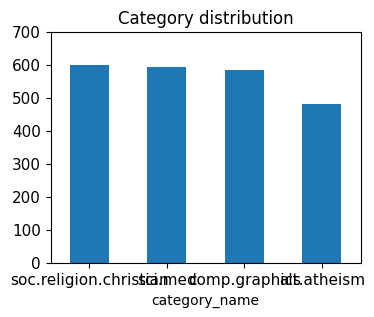

In [392]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

category_name
sci.med                   265
soc.religion.christian    262
comp.graphics             251
alt.atheism               222
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

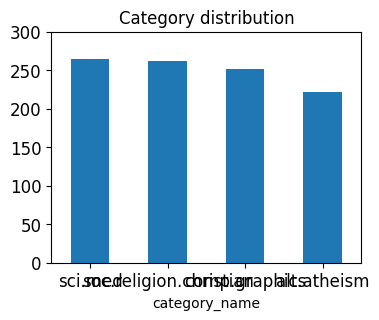

In [393]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (4,3))

### 5.2 Feature Creation

```
import nltk
```

In [394]:
import nltk

In [395]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [396]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


### 5.3 Feature subset selection 

> This part adds the 'Finding frequent patterns' and filters out the first 5% and the bottom 1% to process the data together, and in the part of filtering words, I use the original setting `stop_words='english'` (I think it another try to filter out common and non-featured words), and set it to only appear 90% of the time and filter out all words that appear less than twice.

In [397]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Function to create term-document frequency DataFrame for a given category
def create_term_document_df(text_data):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(text_data)  # Transform the text data into word counts
    words = count_vect.get_feature_names_out()  # Get the unique words (vocabulary) from the vectorizer
    return pd.DataFrame.sparse.from_spmatrix(X_counts, columns=words), X_counts, count_vect

# Function to filter words based on the bottom 1% and top 5% of word sums across documents
def filter_term_document_df(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()  # Sort the words by their total sum

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index

    # Return the filtered DataFrame
    return term_document_df.drop(columns=words_to_remove)

# Optimized approach to create filtered term-document frequency DataFrames for each category
def process_categories(dataframe, text_column='text', category_column='category_name'):
    categories = dataframe[category_column].unique()  # Get unique category labels
    term_document_dfs = {}  # Dictionary to store filtered term-document DataFrames for each category
    X_counts_dict = {}  # Dictionary to store X_counts for each category
    count_vect_dict = {}  # Dictionary to store count_vect for each category

    for category in categories:
        print(f'\nProcessing category: {category}')
        category_df = dataframe[dataframe[category_column] == category][text_column]  # Filter the text data by category
        
        # Create and filter term-document frequency DataFrame
        term_document_df, X_counts, count_vect = create_term_document_df(category_df)
        filtered_df = filter_term_document_df(term_document_df)
        term_document_dfs[category] = filtered_df
        X_counts_dict[category] = X_counts
        count_vect_dict[category] = count_vect

        # Example: Get term frequencies from X_counts
        term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
        print(f'Term frequency for the first word in category {category}: {term_frequencies[0]}')

    return term_document_dfs, X_counts_dict, count_vect_dict

# Example usage
term_document_dfs, X_counts_dict, count_vect_dict = process_categories(X)

# Example: Display the filtered DataFrame for one of the categories
category_number = 0  # You can change this to select a different category
print(f"Filtered Term-Document Frequency DataFrame for Category {list(term_document_dfs.keys())[category_number]}:")
print(term_document_dfs[list(term_document_dfs.keys())[category_number]])


Processing category: comp.graphics
Term frequency for the first word in category comp.graphics: 34

Processing category: soc.religion.christian
Term frequency for the first word in category soc.religion.christian: 55

Processing category: sci.med
Term frequency for the first word in category sci.med: 42

Processing category: alt.atheism
Term frequency for the first word in category alt.atheism: 3
Filtered Term-Document Frequency DataFrame for Category comp.graphics:
     000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   


### 5.4 Attribute Transformation / Aggregation

> the `np.asarray` is more efficiency than `for j in range(0,X_counts.shape[1])`

In [398]:
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

print(term_frequencies[0])

3


> The original code uses `set_xticklabels()` to set the x-axis labels. This approach requires that the number of ticks matches the labels before using `set_xticklabels()`, otherwise an error or warning may occur.   
> Therefore, an additional `set_xticks()` must be added to explicitly specify the position of the ticks.
> In contrast, it is simpler to use `plt.xticks()` directly, as it directly affects the currently existing tick labels without the need to set additional tick positions. This makes the code more compact and reduces the number of unnecessary steps, which makes it suitable for quick operations!

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_63872/833708863.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


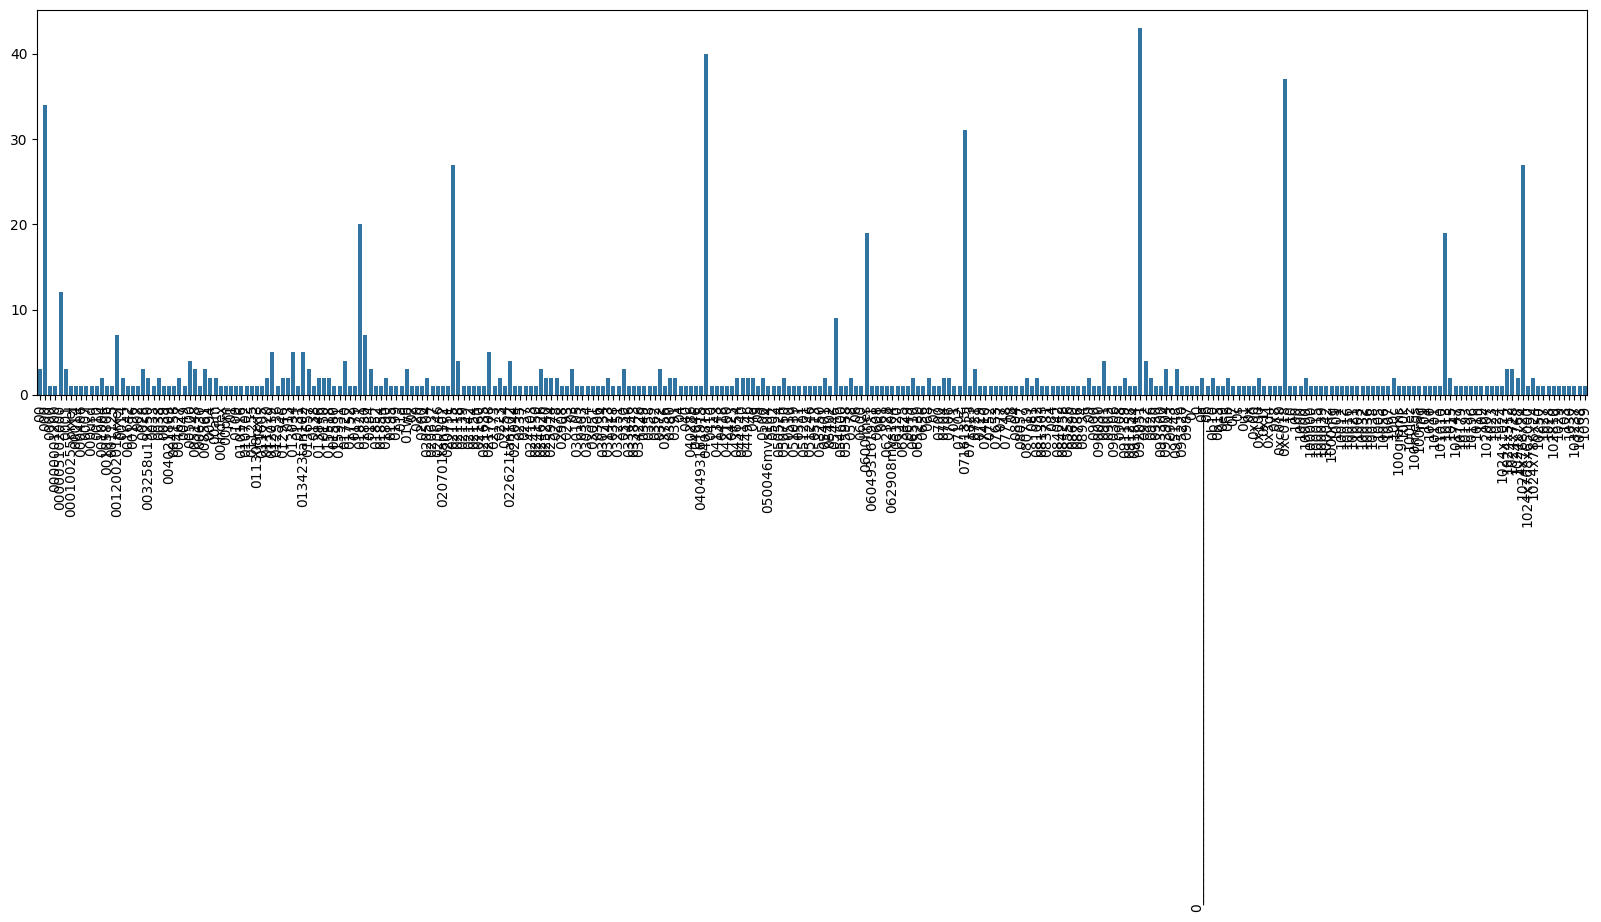

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20, 5))  # Adjusted to a more reasonable size

g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
plt.xticks(rotation=90)  # Directly rotate all the tick labels
plt.tight_layout()
plt.show()


```
 import the `math`
```

In [400]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_63872/3145404642.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


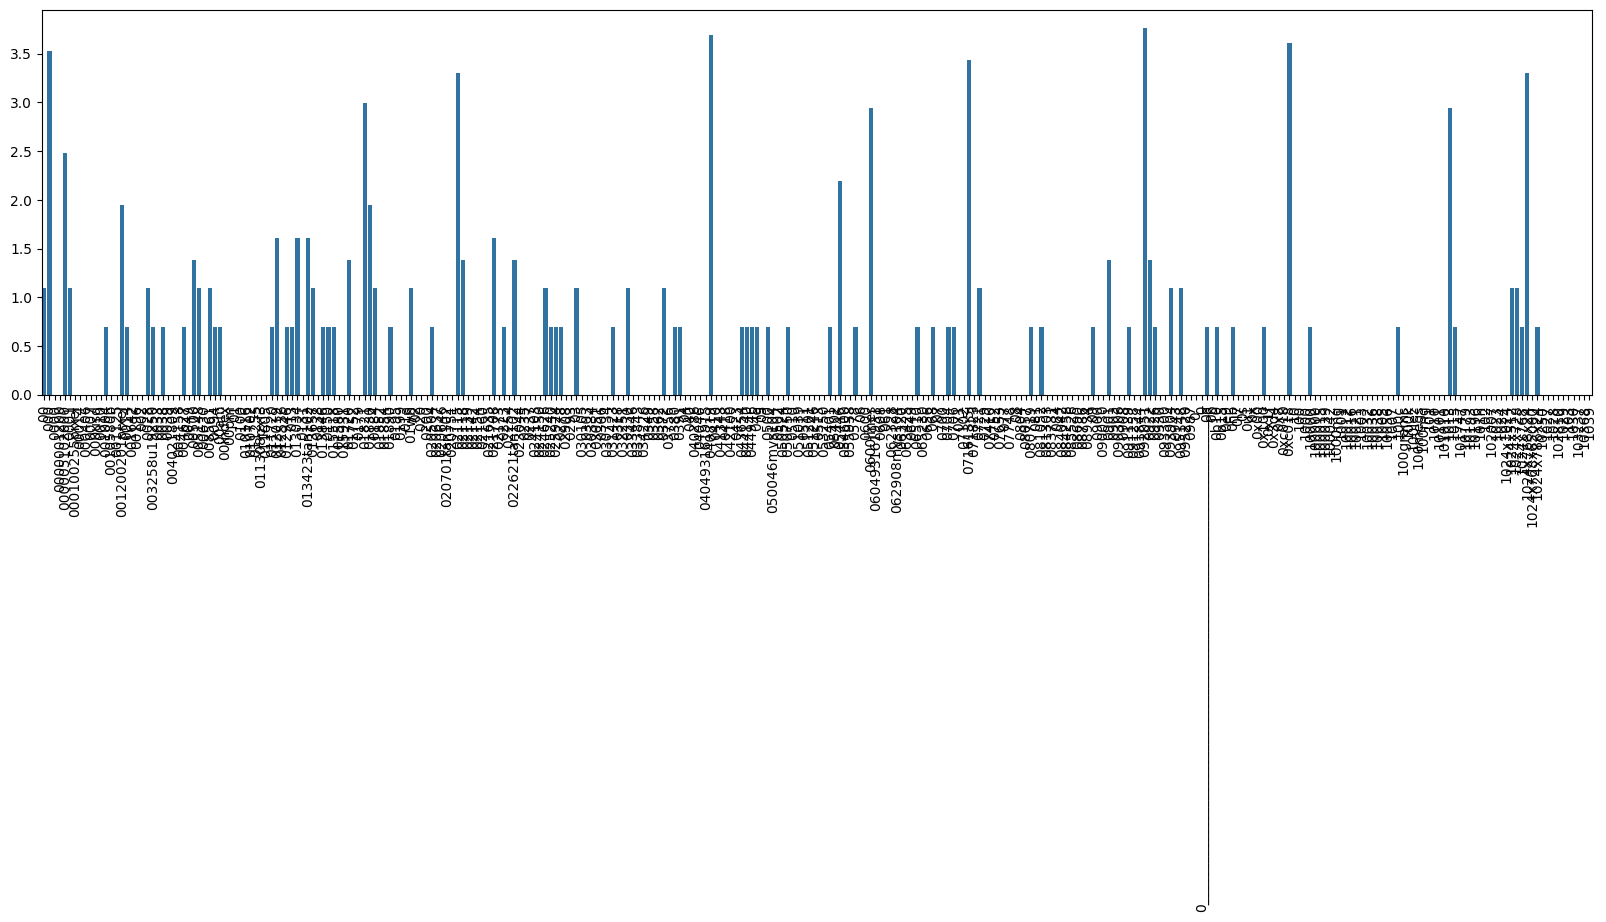

In [401]:
plt.subplots(figsize=(20, 5))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_log[:300])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###  Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

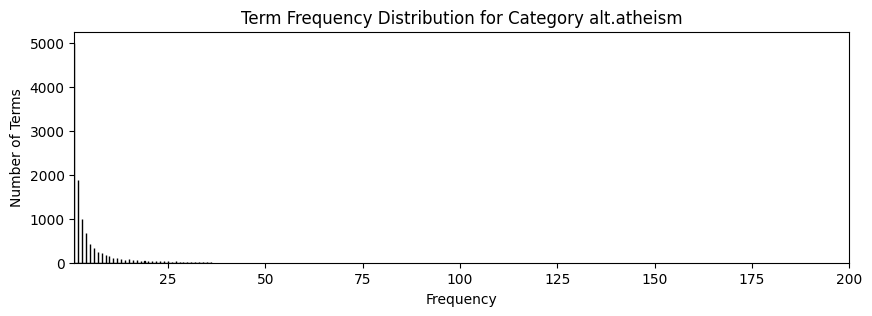

In [402]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 3))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

> 1.The code now uses `ThreadPoolExecutor` from `concurrent.futures` to run each conversion in parallel.    
> 2.The replace operation is now performed only once per category, directly within the function that handles the conversion

In [403]:
path = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/twentynews_II'

In [404]:
from PAMI.extras.convert.DF2DB import DF2DB   

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'{path}/td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


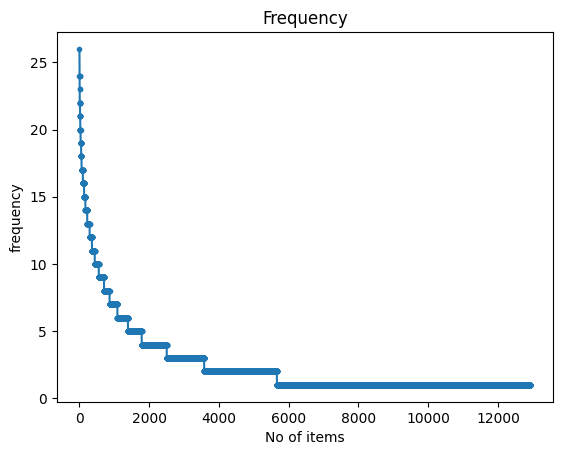

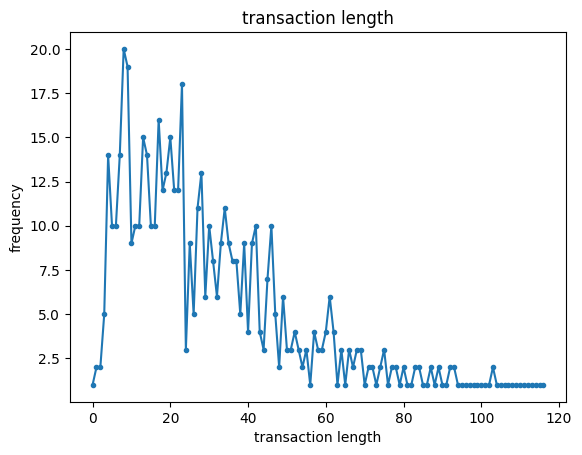

In [405]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase(f'{path}/td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


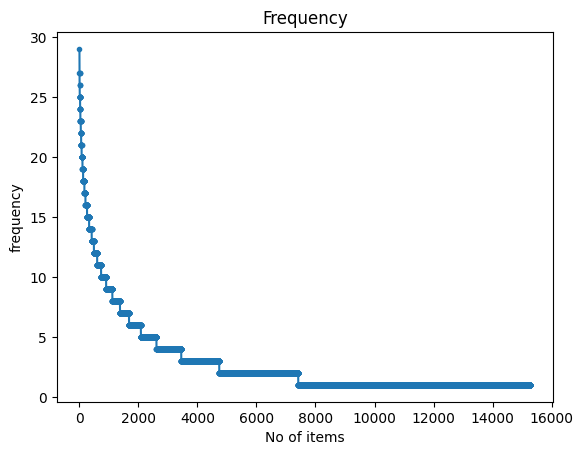

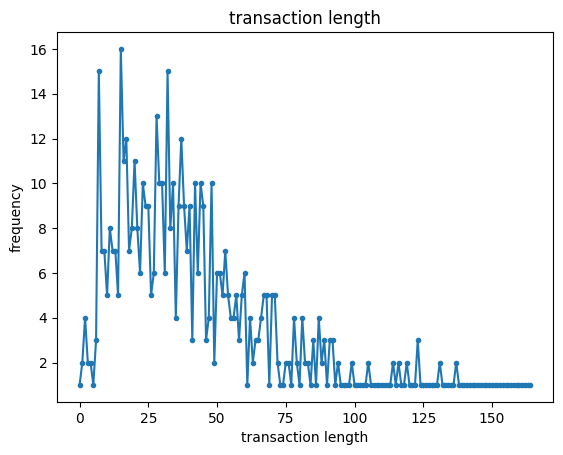

In [406]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{path}/td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


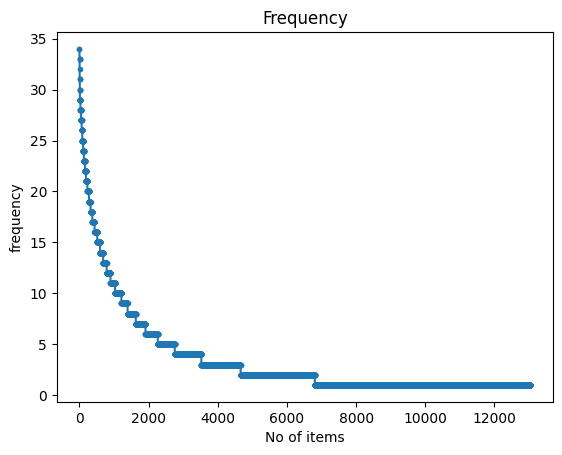

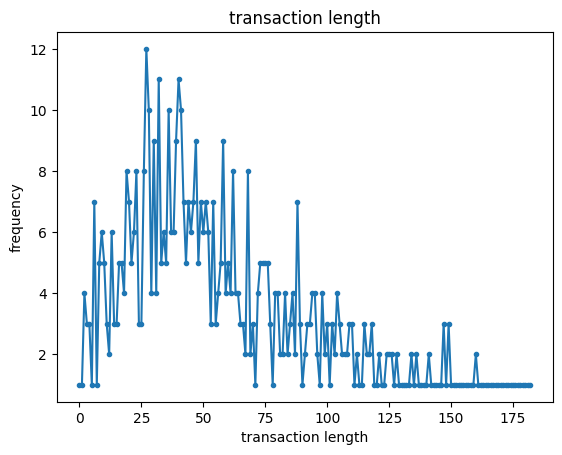

In [407]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{path}/td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


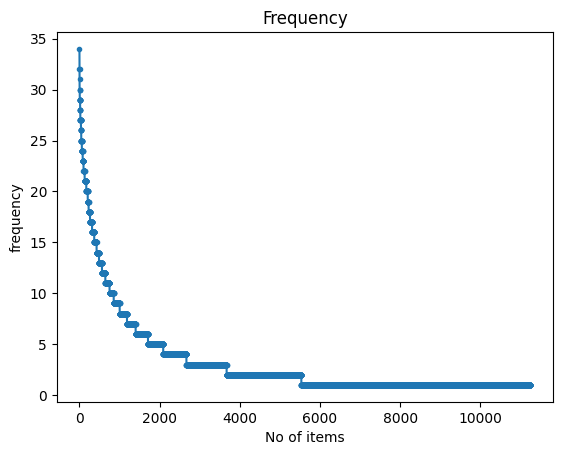

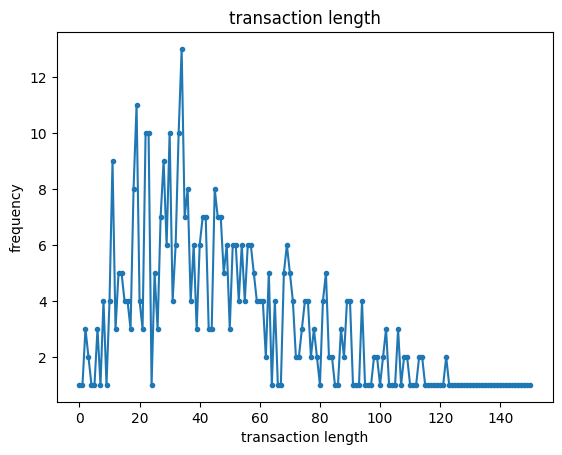

In [408]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{path}/td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Now that we have reviewed the stats of our databases, there are some things to notice from them, the total number of transactions refer to the amount of documents per category, the number of items refer to the amount of unique words encountered in each category, the transaction size refers to the amount of words per document that it can be found, and we can see that our databases are very sparse, this is the result of having many zeros in the first place when making the document-term matrix. 

In [409]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
# Set the minimum support for FP-Growth
obj1 = alg.FPGrowth(iFile=f'{path}/td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.06992483139038086


In [410]:
obj1.save(f'{path}/freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

,Patterns,Support
0,leave,9
1,swell,9
2,color,9
3,confused,9
4,learning,9
...,...,...
9995,means,27
9996,haven,27
9997,happen,27
9998,originator,27


In [411]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile=f'{path}/td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.07035112380981445


In [412]:
obj2.save(f'{path}/freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

,Patterns,Support
0,choices,9
1,corp,9
2,hausmann,9
3,hausmann maddi,9
4,kids,9
...,...,...
4671,date,31
4672,date gmt,19
4673,stay,32
4674,snm6394,32


In [413]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile=f'{path}/td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.05035066604614258


In [414]:
obj3.save(f'{path}/freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

,Patterns,Support
0,individual,9
1,certain,9
2,hall,9
3,mike,9
4,vr,9
...,...,...
33569,life,24
33570,ideas,24
33571,feel,24
33572,tried,24


In [415]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile=f'{path}/td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.13518500328063965


In [416]:
obj4.save(f'{path}/freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

,Patterns,Support
0,latest,9
1,san,9
2,seven,9
3,schools,9
4,chose,9
...,...,...
11208,34,33
11209,institute,33
11210,ways,33
11211,oh,34


Now that we've extracted the transactional patterns from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

The reason for focusing on **unique patterns** is that they can **significantly improve the classification process**. When a document contains these distinctive patterns, it provides clear, category-specific signals that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

> 1.Using `Counter` from the `collections` module provides an efficient way to count occurrences across multiple dataframes, as it is optimized for frequency counting and simplifies the code.    
> 2.Using list comprehensions for filtering makes the code more concise and efficient, as it reduces the overhead of explicit loops and leverages vectorized operations.

In [417]:
import pandas as pd
from collections import Counter

# Group all dataframes together
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

# Count how many times each pattern appears across all dataframes
pattern_counts = Counter()
for df in dfs:
    pattern_counts.update(df['Patterns'])

# Identify patterns that appear in only one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)

# Filter each dataframe to keep only the unique patterns
filtered_dfs = [df[df['Patterns'].isin(unique_patterns)] for df in dfs]

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(final_pattern_df)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [418]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Use list comprehension to initialize and populate the pattern matrix more efficiently
pattern_words_list = [set(pattern.split()) for pattern in final_pattern_df['Patterns']]
pattern_matrix = pd.DataFrame(
    {pattern: X['tokenized_text'].apply(lambda x, pw=pattern_words: 1 if pw.issubset(x) else 0) 
     for pattern, pattern_words in zip(final_pattern_df['Patterns'], pattern_words_list)},
    index=X.index
)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df


,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,soc princeton funds motss matching,soc princeton boy motss matching,et axes motss matching,soc princeton et motss matching,soc princeton al motss matching,axes funds motss matching,boy funds motss matching,boy axes motss matching,et funds motss matching,swell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.5 Dimensionality Reduction

In [419]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [420]:
print(X_pca_tdm.shape, X_tsne_tdm.shape, X_umap_tdm.shape)

(2257, 2) (2257, 2) (2257, 2)


> Using a mask `category_mask` to filter the data points for each category, which is faster than repeatedly indexing within the loop.     
> Simplifying the extraction of the first two components with `.T[:2]`.

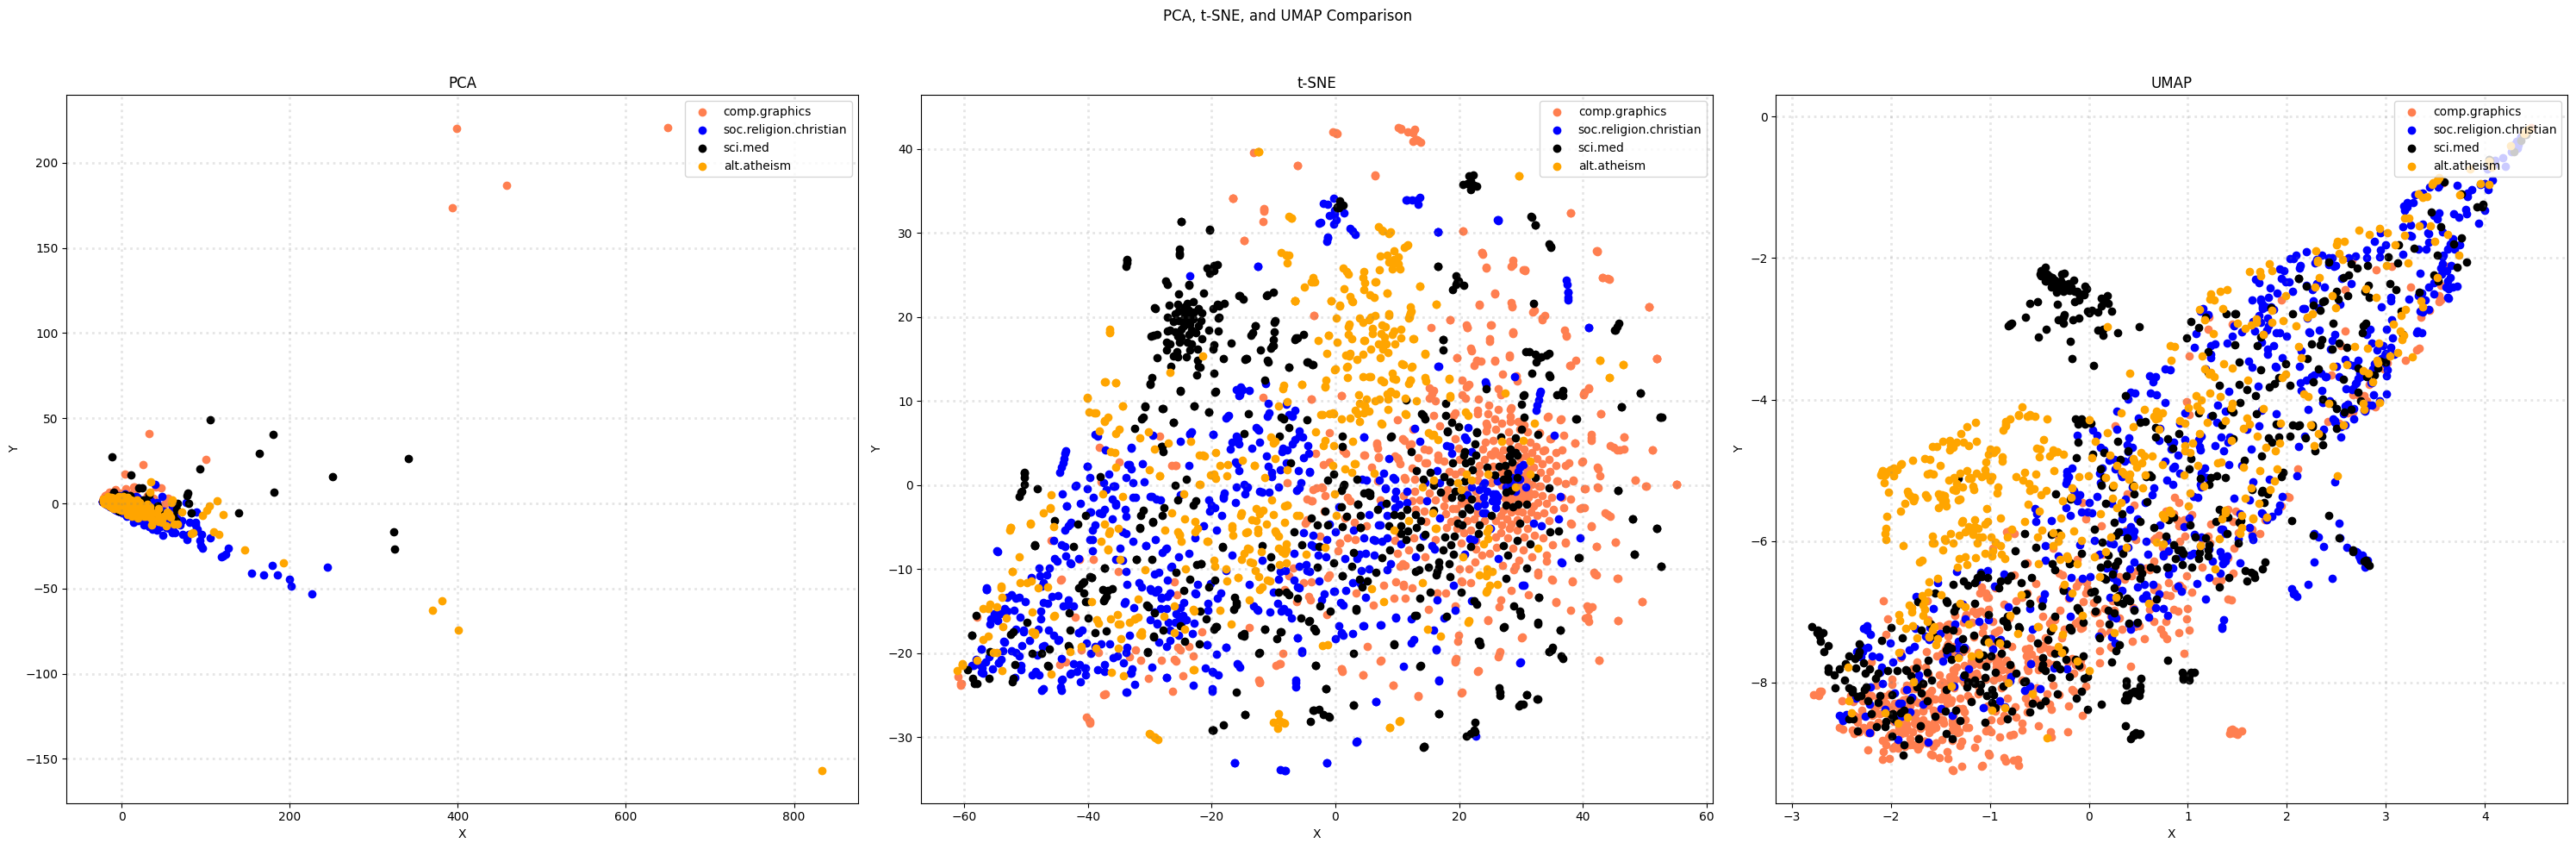

In [421]:
import matplotlib.pyplot as plt

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        category_mask = X['category_name'] == category
        xs, ys = X_reduced[category_mask].T[:2]  # Extract the first two components for scatter plot
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP using the defined function
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [422]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

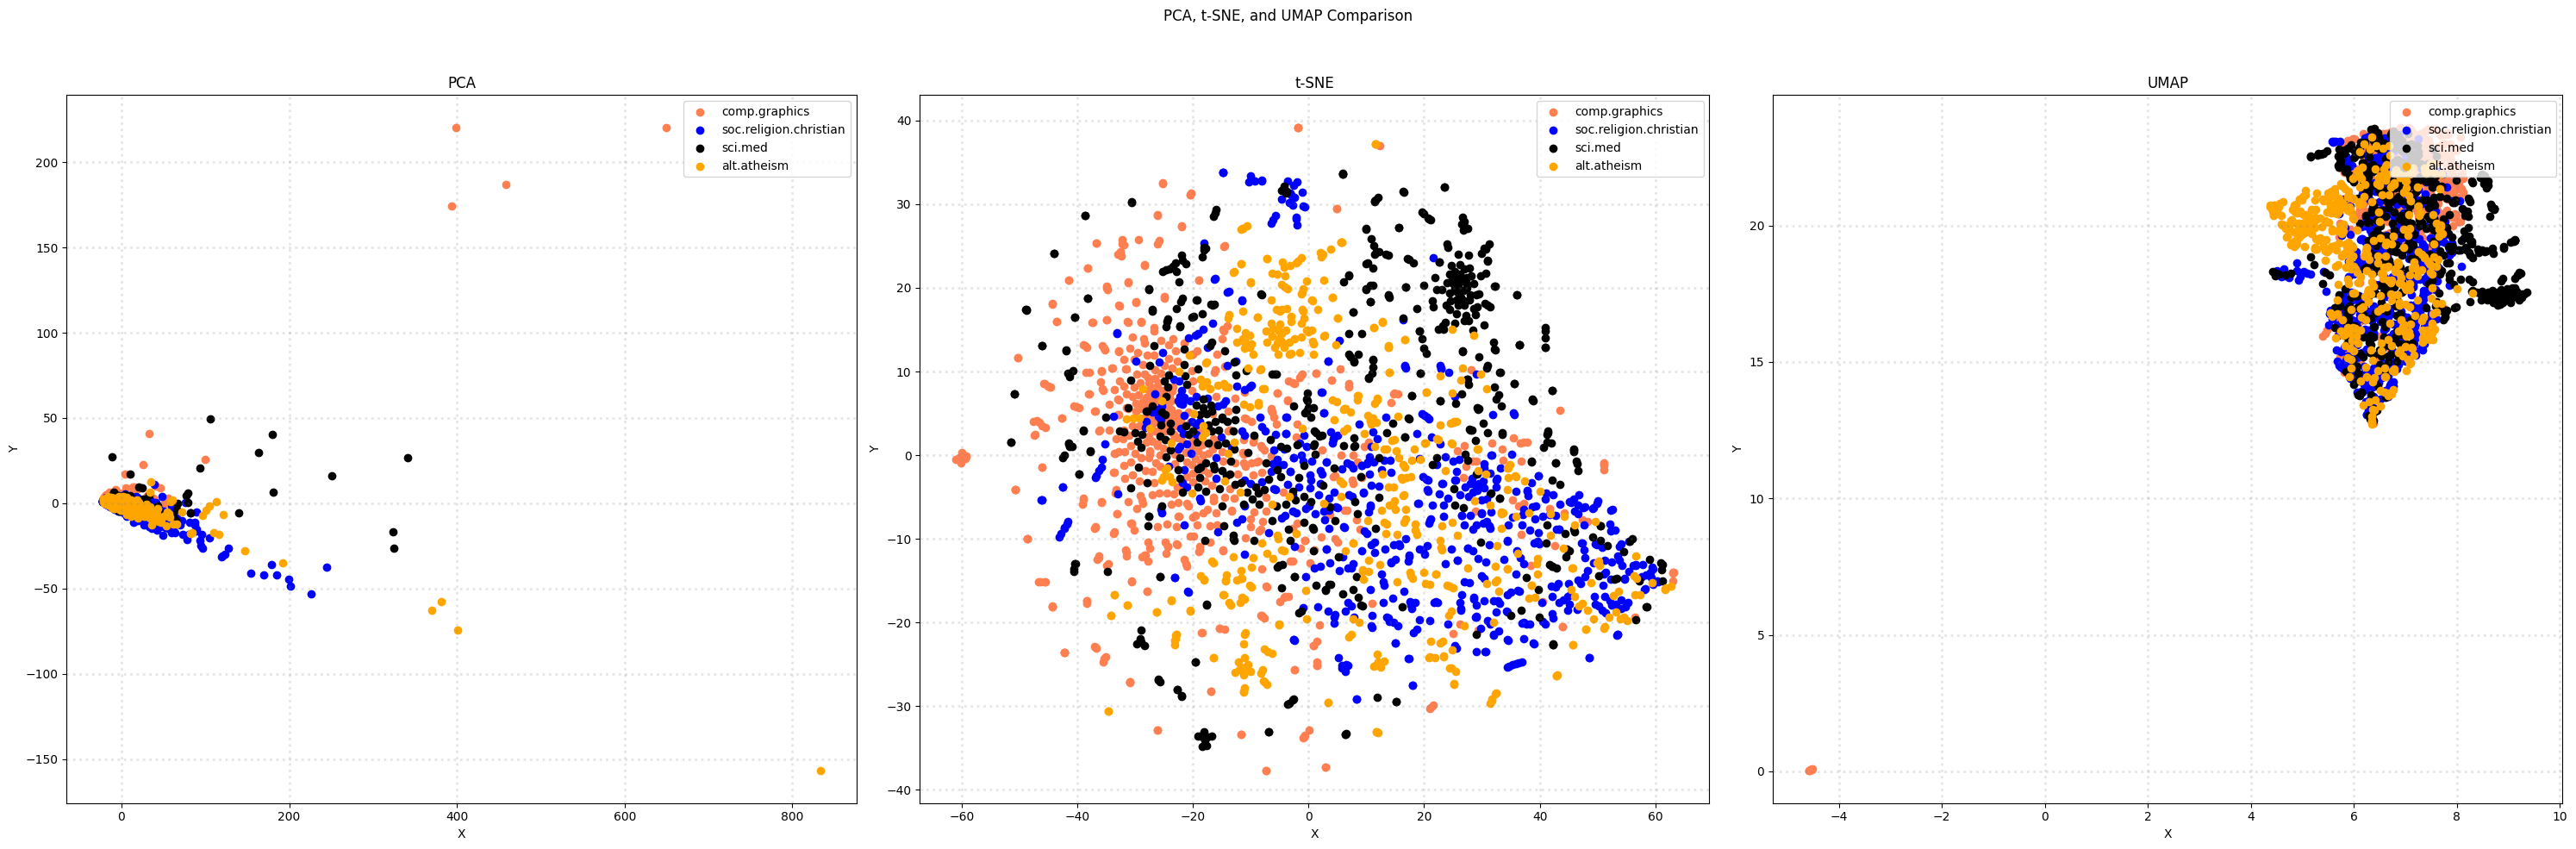

In [423]:
import matplotlib.pyplot as plt

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

```
Reduce the dimension to 3
```

In [424]:
X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

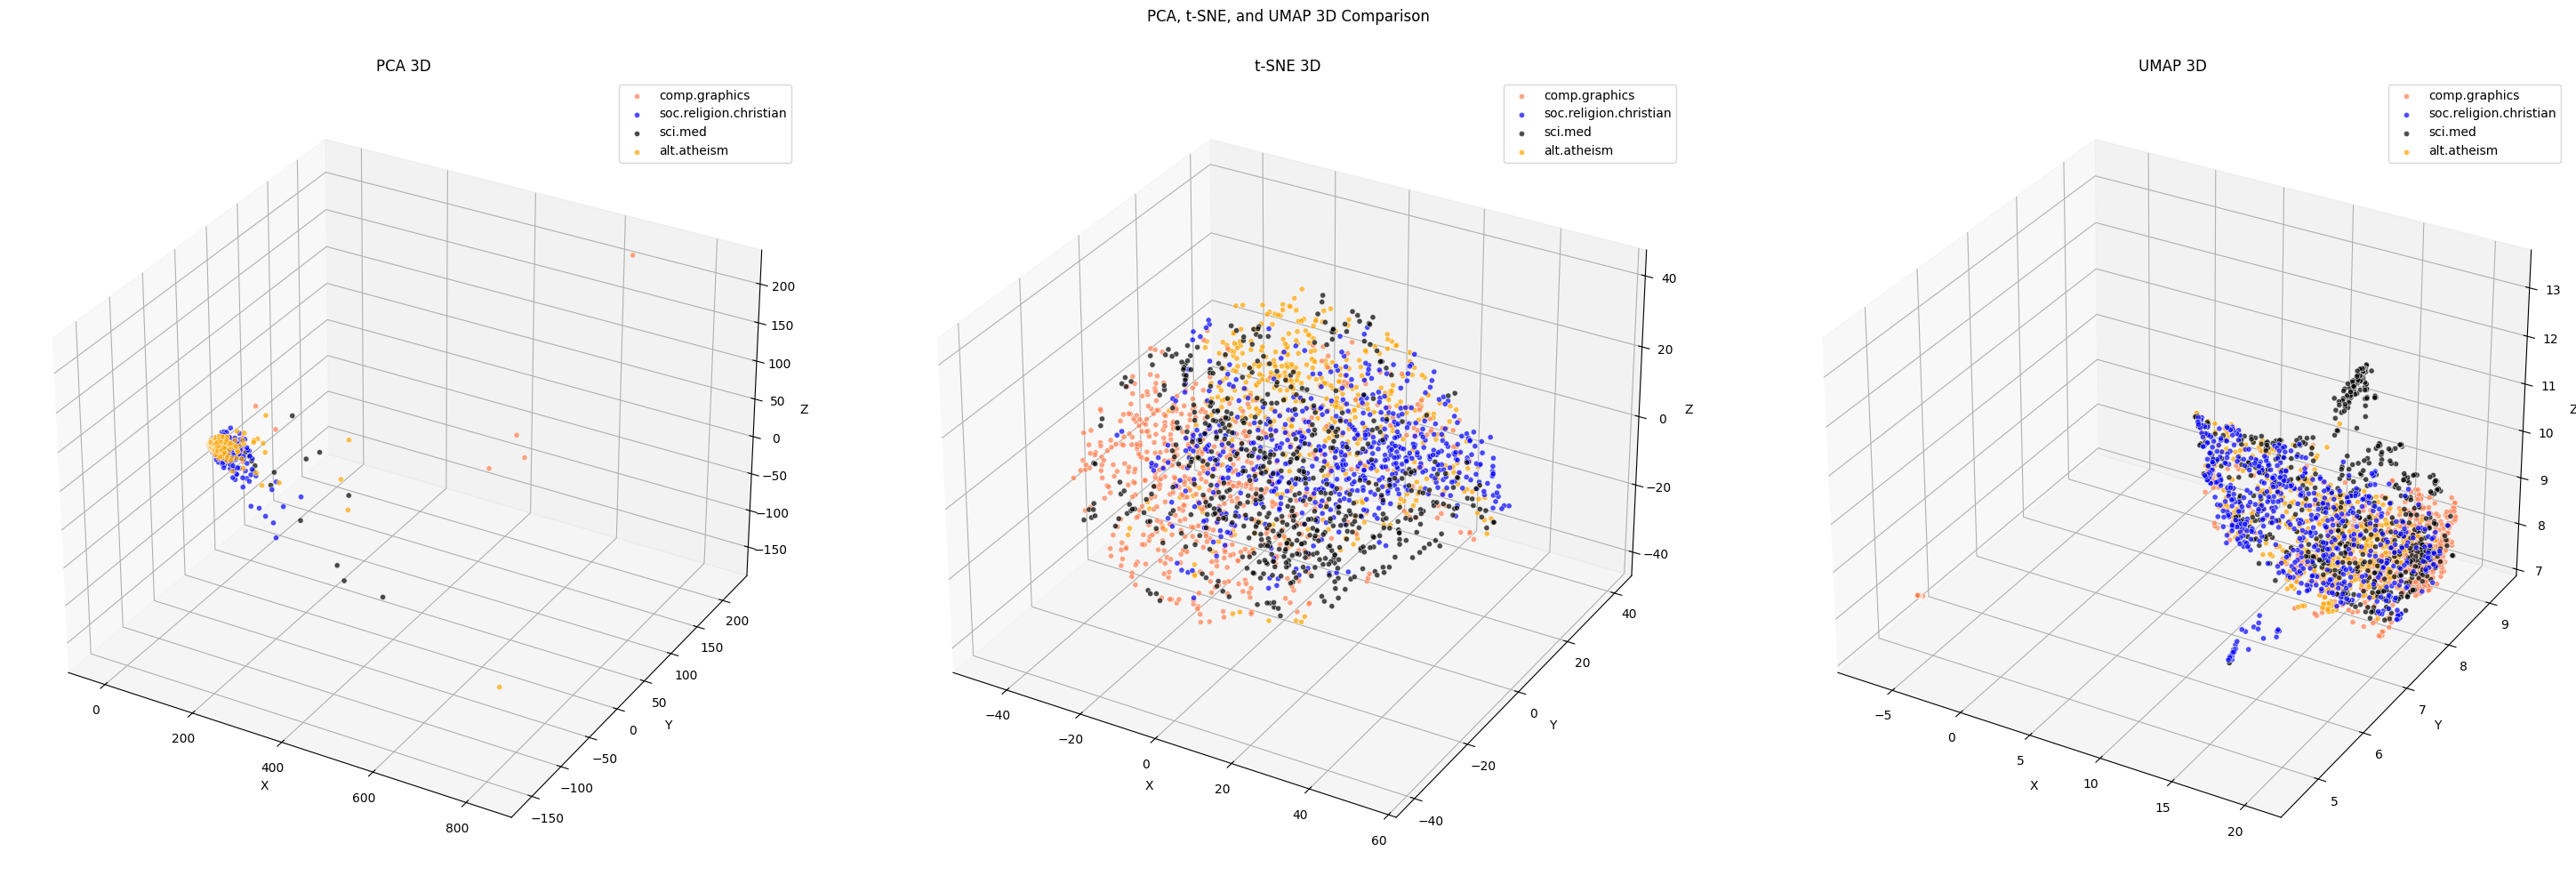

In [425]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Set colors and categories
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig = plt.figure(figsize=(30, 10))  # Create figure for subplots
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison')

# Convert X['category_name'] to a NumPy array for faster indexing
category_array = X['category_name'].values

# Define a function to create a 3D scatter plot for each method more efficiently
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        category_mask = category_array == category
        xs, ys, zs = X_reduced[category_mask, 0], X_reduced[category_mask, 1], X_reduced[category_mask, 2]  # Extract coordinates directly using NumPy indexing
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.7, edgecolors='w', linewidth=0.5)
    
    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_scatter_3d(ax1, X_pca_aug_3, 'PCA 3D')

ax2 = fig.add_subplot(132, projection='3d')
plot_scatter_3d(ax2, X_tsne_aug_3, 't-SNE 3D')

ax3 = fig.add_subplot(133, projection='3d')
plot_scatter_3d(ax3, X_umap_aug_3, 'UMAP 3D')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 5.6 Discretization and Binarization

In [426]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [427]:
mlb = preprocessing.LabelBinarizer()

In [428]:
print(X.columns)

Index(['text', 'category', 'category_name', 'unigrams', 'tokenized_text'], dtype='object')


In [429]:
mlb.fit(X.category)

LabelBinarizer()

In [430]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [431]:
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{into, Thanks, 14, also, III, like, correct, O...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{into, 28, Sciences, Kentucky,, be, cells., me...","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{due, San, And, from, healing., I'll, (signs, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{schools,, tell, important, english,, Zwart), ...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{>hmmmmmm., parable,, Brother, those, man, lik...","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{matters, could, 28, reasonable,, |, Indeed,, ...","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{be., re-read, Joe, remainder, from, >Re-think...","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","{chance., limp, appropriate, miserable, Dalaci...","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","{claimed., |, Gordon, One, Well,, just, 2, >bl...","[0, 0, 0, 0]"


# 6. Data Exploration

> Instead of creating separate lists (document_to_transform_1, document_to_transform_2, document_to_transform_3), a single list documents_to_transform is used.

In [432]:
# We retrieve 3 sentences for random records
indices = [50, 100, 150]
documents_to_transform = []

for index in indices:
    random_record = X.iloc[index]['text']
    documents_to_transform.append(random_record)

In [433]:
for i, document in enumerate(documents_to_transform, 1):
    print(f"document_to_transform_{i}:", document)

document_to_transform_1: From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That's not my point.  I'm >philosophically< opposed to it because of its complexity.  This complexity has led to some programs' poor TIFF writers making some very bizarre files, other programs' inability to load TIFF images (though they'll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It's not me I'm worried about- it's all the >other<  assholes out there!"  I've had big trouble with misuse and abuse

> By using two nested loops (for i in range(len(documents_vector_count)) and for j in range(i, len(documents_vector_count))), the improved version calculates cosine similarities for all document pairs (including self-similarities). The outer loop starts with document i, and the inner loop starts from i to avoid redundant calculations (i.e., calculating both doc1 vs doc2 and doc2 vs doc1 since they are the same).

In [434]:
from sklearn.preprocessing import binarize

documents_vector_count = []
documents_vector_count_bin = []

# Transform sentence with Vectorizers and binarize
for document in documents_to_transform:
    vector_count = count_vect.transform([document])
    documents_vector_count.append(vector_count)
    
    vector_count_bin = binarize(vector_count)
    documents_vector_count_bin.append(vector_count_bin)

# Print vectors
print("Let's take a look at the count vectors:")
for i, vector in enumerate(documents_vector_count, 1):
    print(f"document_vector_count_{i}:\n{vector.todense()}")

Let's take a look at the count vectors:
document_vector_count_1:
[[0 0 0 ... 0 0 0]]
document_vector_count_2:
[[0 0 0 ... 0 0 0]]
document_vector_count_3:
[[0 0 0 ... 0 0 0]]


In [435]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
similarity_results = []


for i in range(len(documents_vector_count)):
    for j in range(i, len(documents_vector_count)):
        cos_sim = cosine_similarity(documents_vector_count[i], documents_vector_count[j], dense_output=True)
        similarity_results.append((i + 1, j + 1, cos_sim))

# Print Cosine Similarities
for i, j, sim in similarity_results:
    print(f"Cosine Similarity using count between {i} and {j}: {sim[0][0]:.4f}")

Cosine Similarity using count between 1 and 1: 1.0000
Cosine Similarity using count between 1 and 2: 0.6089
Cosine Similarity using count between 1 and 3: 0.6220
Cosine Similarity using count between 2 and 2: 1.0000
Cosine Similarity using count between 2 and 3: 0.5656
Cosine Similarity using count between 3 and 3: 1.0000


---

# 7. Data Classification

> 1.Applied `LabelEncoder` to `category`, which is faster and also reduces the risk of mapping errors.    
> 2.Combined `CountVectorizer` and `MultinomialNB` into a `Pipeline` to make the training and prediction process more efficient and readable.

In [436]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


# Encode the category labels using LabelEncoder
label_encoder = LabelEncoder()
X['category'] = label_encoder.fit_transform(X['category'])

# Create a mapping from numerical labels to category names for reporting
category_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Convert the numerical category labels to text labels
target_names = [str(label) for label in label_encoder.classes_]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X['text'], X['category'], test_size=0.3, random_state=42)

# Create a pipeline that combines CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)


In [437]:
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.967551622418879

Classification Report:
               precision    recall  f1-score   support

           0     0.9535    0.9535    0.9535       129
           1     0.9708    0.9822    0.9765       169
           2     0.9734    0.9683    0.9708       189
           3     0.9684    0.9634    0.9659       191

    accuracy                         0.9676       678
   macro avg     0.9665    0.9668    0.9667       678
weighted avg     0.9676    0.9676    0.9675       678



In [438]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [439]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9734513274336283

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9837    0.9380    0.9603       129
         comp.graphics     0.9940    0.9822    0.9881       169
               sci.med     0.9789    0.9841    0.9815       189
soc.religion.christian     0.9444    0.9791    0.9614       191

              accuracy                         0.9735       678
             macro avg     0.9753    0.9709    0.9728       678
          weighted avg     0.9739    0.9735    0.9735       678

